# Project Machine Learning: Group 25
### Peter Bonnarens, Lennert Franssens & Philip Kukoba

# Sprint 1 : Tabular Data

### Possible tasks:
* Thorough exploratory data analysis, e.g.:
    * Are there substantial price differences between neighbourhoods ?
    * Are there hosts with more than one listing ? How does this impact the price ?
    * What is the correlation between the review score and the price ?
    * ...

    Not enough to just show a plot! Clearly describe WHAT question you investigated, WHY you think this is a relevant question
    and WHAT you deduce/conclude from the results of your data analysis

* Are there outliers ?
* A new Airbnb owner needs to pick an appropriate price:
    * Train a model to predict the price based on a selection of features
    * Find the most similar listings
    
* ...

# Table of work (who did what)

<br>

## Exploratory Data Analysis (EDA)
|                   	| EDA step 1 	| EDA step 2A 	| EDA step 2B 	| EDA step 2C 	| EDA step 2D 	| EDA step 3A 	| EDA step 3B 	| EDA step 3C 	| EDA step 3D 	| EDA step 3E 	| EDA step 3F 	|
|:-----------------:	|:----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|
|  Peter Bonnarens  	|      X     	|             	|      X      	|             	|             	|      X       	|      X       	|      X       	|            	|      X      	|      X      	|
| Lennert Franssens 	|      X     	|      X      	|      X      	|             	|      X      	|      X       	|      X       	|      X       	|      X       	|      X       	|      X       	|
|   Philip Kukoba   	|      X     	|             	|             	|      X      	|             	|             	|             	|            	|            	|            	|            	|

<br>

## Linear Regression Model (LR)
|                   	| LR step 1 	| LR step 2 	| LR step 3 	| LR step 4 	|
|:-----------------:	|:---------:	|:---------:	|:---------:	|:---------:	|
|  Peter Bonnarens  	|      X     	|           	|      X     	|       X     	|
| Lennert Franssens 	|      X     	|           	|           	|       X     	|
|   Philip Kukoba   	|           	|           	|           	|           	|

<br>

# Exploratory Data Analysis (EDA)

## Step 1: imports & loading the dataset
In this step we import the needed libraries and read the dataset into a pandas dataframe.

In [1]:
%matplotlib inline

# imports
import numpy as np
import matplotlib.pyplot as plt

import regex as re

import pandas as pd  
import seaborn as sns 
from matplotlib import rcParams

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KDTree
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings

# delete warnings from output
warnings.filterwarnings('ignore')

# figure size in inches
plt.rcParams['figure.figsize'] = 15, 12

# loading the dataset into pandas dataframe
listings = pd.read_csv("data/listings.csv")

## Step 2: preprocessing

Before we can start our EDA, we need to preprocess our data. This means changing string values to integers, removing NaN values, removing garbage data...
Let us first take a look at our dataset. 

In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN


In [3]:
print(listings.shape)

(923, 75)


Notice that the dataset contains a lot of text values that are not needed for this sprint, and that we start with 923 rows of data and 75 features. The first step is to make a selection of the features we think can be useful or can give us insights.

### 2A : Feature subset selection

Here is a list of the features that we think could possibly be useful during this sprint:
* **id**: (int64) unique identifier for the listing
* **host_id**: (object) unique identifier for the host
* **host_response_time**: (object) description of how long it usually takes the host to respond
* **host_response_rate**: (object) the % rate at which the host responds
* **host_acceptance_rate**: (object) the % rate at which the host accepts booking requests
* **host_total_listings_count**: (int64) The number of listings the host has
* **host_verifications**: (object) array containing the different types of verification methods the host supports
* **host_has_profile_pic**: (object) boolean value that indicates if the host has a profile picture or not
* **host_identity_verified**: (object) boolean value that indicates wether the host is verified or not
* **neighbourhood_cleansed**: (object) the neighbourhood as geocoded using the latitude and longitude
* **latitude**: (object) latitude of listing
* **longitude**: (object) longitude of listing
* **room_type**: (object) room type
* **accomodates**: (object) maximum capacity of the listing
* **bedrooms**: (object) number of bedrooms in the listing
* **beds**: (float64) number of beds
* **price**: (object) daily price in local currency
* **minimum_nights**: (object) minimum number of night stay for the listing
* **maximum_nights**: (int64) maximum number of night stay for the listing
* **number_of_reviews**: (object) the number of reviews the listing has
* **number_of_reviews_ltm**: (int64) the number of reviews the listing has (in the last 12 months)
* **last_review**: (object) the date of the last/newest review
* **review_scores_rating**: (object) overall rating of the listing
* **instant_bookable**: (object) boolean value that indicates wwhether the guest can automatically book the listing without the host requiring to accept their booking request
* **reviews_per_month**: (float64) the number of reviews the listing has over the lifetime of the listing

We noticed that some rows in the dataset contained data that was shifted 1 column to the right starting from the 'host_since' column. Instead of removing these rows from the dataset, we decided to shift these rows 1 column back to the left.

In [4]:
# find lines to shift and add them to a mask - we've found that some lines are shifted 1 to the right beginning on the host_id column (that now contains garbage data)
shifted_lines = listings[pd.to_numeric(listings["host_verifications"], errors='coerce').notnull()].id
mask = listings['id'].isin(shifted_lines)

# shift lines 1 to the left
listings.loc[mask, 'host_since':'reviews_per_month'] = listings.loc[mask, 'host_since':'reviews_per_month'].shift(-1, axis=1)

Some of these features do not have the types we expect them to be. This is due to the fact that there are still NaN/garbage values in the dataset. Some columns also nead to be cast to the correct type. We can check the types of the columns like this:

In [5]:
print(listings.dtypes.to_string())

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                          object
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

Now we select all the features we think will be useful during this project.

In [6]:
# prepare extra columns to split number of bathrooms per type
listings['priv_bath'] = listings['bathrooms_text']
listings['bathrooms'] = listings['bathrooms_text']

# filter columns

listings = listings[["id", "host_id", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_total_listings_count", 
    "host_verifications", "host_identity_verified", "neighbourhood_cleansed", "latitude", "longitude", "property_type", "room_type",
    "accommodates", "priv_bath", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights","availability_90",
    "number_of_reviews", "number_of_reviews_ltm", "last_review", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value", "instant_bookable", "reviews_per_month"]]

### 2B : cleaning the data
Before we start plotting features to gain insights, we should clean the data.
First we drop the rows where NaN values are present. These rows are considered as corrupt rows that contain invalid or too few data to work with.
After dropping these rows, we can convert rows with numeric data saved as strings to numeric types.

Some other rows still contain textual data that can easily be transformed to numeric data.


In [7]:
# clean property types
listings['property_type'] = ['Room'    if re.match('.*room.*', x, re.IGNORECASE) 
                                            else 'House' if re.match('.*house.*', x, re.IGNORECASE) 
                                            else 'Apartment' if re.match('.*apartment.*', x, re.IGNORECASE) 
                                            else 'Other'
                                            for x in listings["property_type"]]

# convert percentage to float
listings["host_response_rate"] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# convert to number of verification types
listings['host_verifications'] = listings['host_verifications'].apply(eval).apply(lambda x: len(x))

# convert booleans: 1 if true, 0 if false
listings["host_identity_verified"] = listings["host_identity_verified"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)
listings["instant_bookable"] = listings["instant_bookable"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)
listings["host_is_superhost"] = listings["host_is_superhost"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)

# private bathroom and shared bathroom
listings['bathrooms'] = listings['bathrooms'].replace('\s.*', '', regex=True)
listings['bathrooms'] = listings['bathrooms'].replace('^[a-zA-Z].*', '0.5', regex=True)
listings['priv_bath'] = listings['priv_bath'].replace('.*ared.*', '0', regex=True)
listings['priv_bath'] = listings['priv_bath'].replace('.*[a-zA-Z].*', '1', regex=True)

listings['bathrooms'] = listings['bathrooms'].astype(float)
listings['priv_bath'] = listings['priv_bath'].astype(float)

# convert currency to float
listings['price'] = listings['price'].replace('[\$,)]', '', regex=True).astype(float)

In [8]:
# first we drop the rows that contain missing values
listings.dropna(inplace=True)

# next we convert some columns to numeric values
listings[["accommodates", "bedrooms", "minimum_nights", "number_of_reviews", "review_scores_rating", "longitude", "beds", "host_id", "host_total_listings_count", "maximum_nights", "number_of_reviews_ltm"]] = listings[["accommodates","bedrooms", "minimum_nights", "number_of_reviews", "review_scores_rating", "longitude","beds", "host_id", "host_total_listings_count", "maximum_nights", "number_of_reviews_ltm"]].apply(pd.to_numeric)

## Step 3 : plots

### 3A: Distributions of the most interesting numeric features

First we will take a look at the distribution of some numeric features. This gives us a general idea of what the possible values of each feature are and what we can expect.

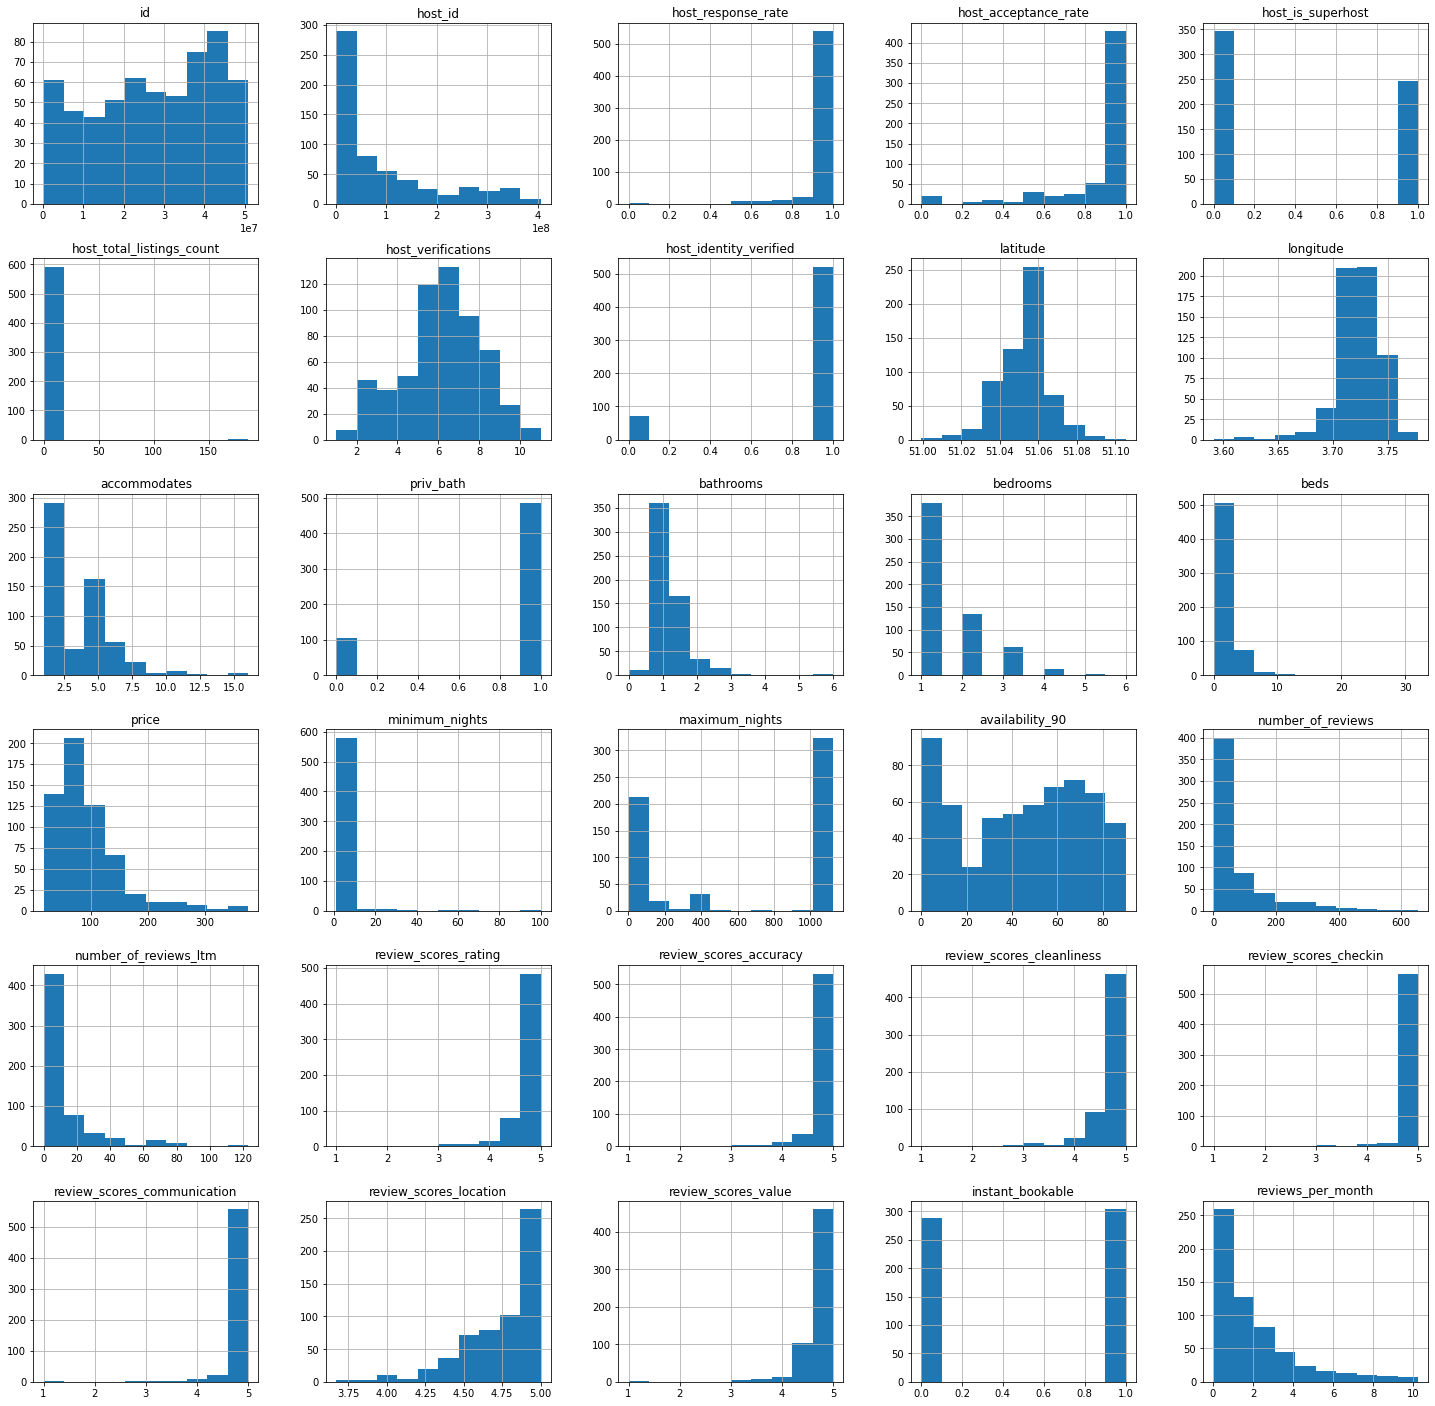

In [9]:
listings.hist(figsize=(25,25));

We notice that a lot of these distributions are skewed. Some of these features like 'number_of_reviews', 'accommodates', 'bathrooms', ... would greatly benefit from a **log transformation**. The transformations will be done in section 3F.

### 3B: Distribution and pairplot

First we will take a look at the distribution of our 'price' feature in greater detail.
Then we will plot all features pairwise to see if there are any good predictors that we can use for a model.

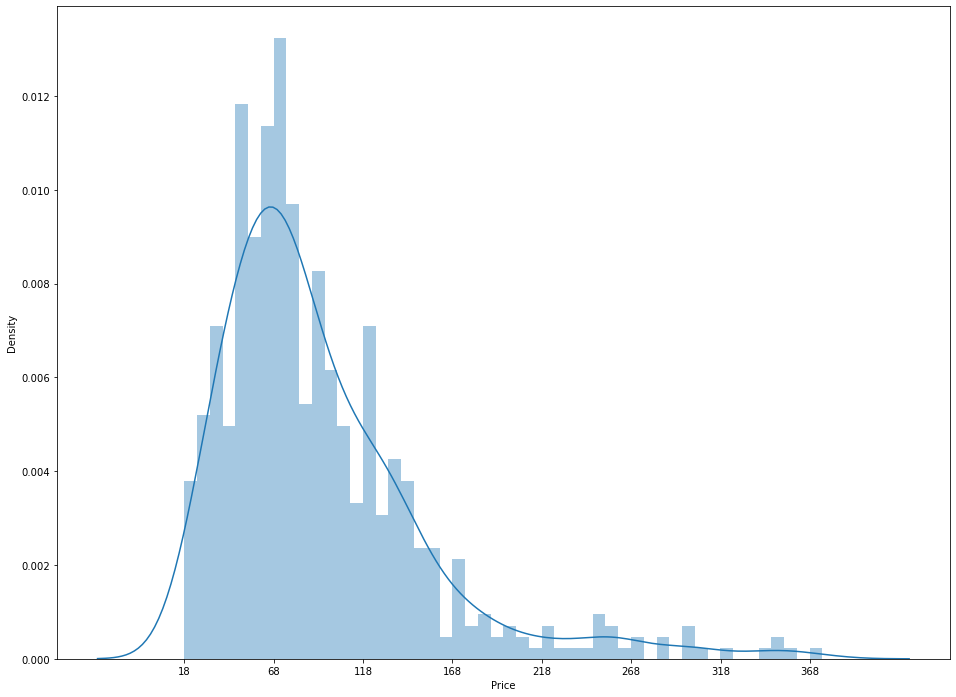

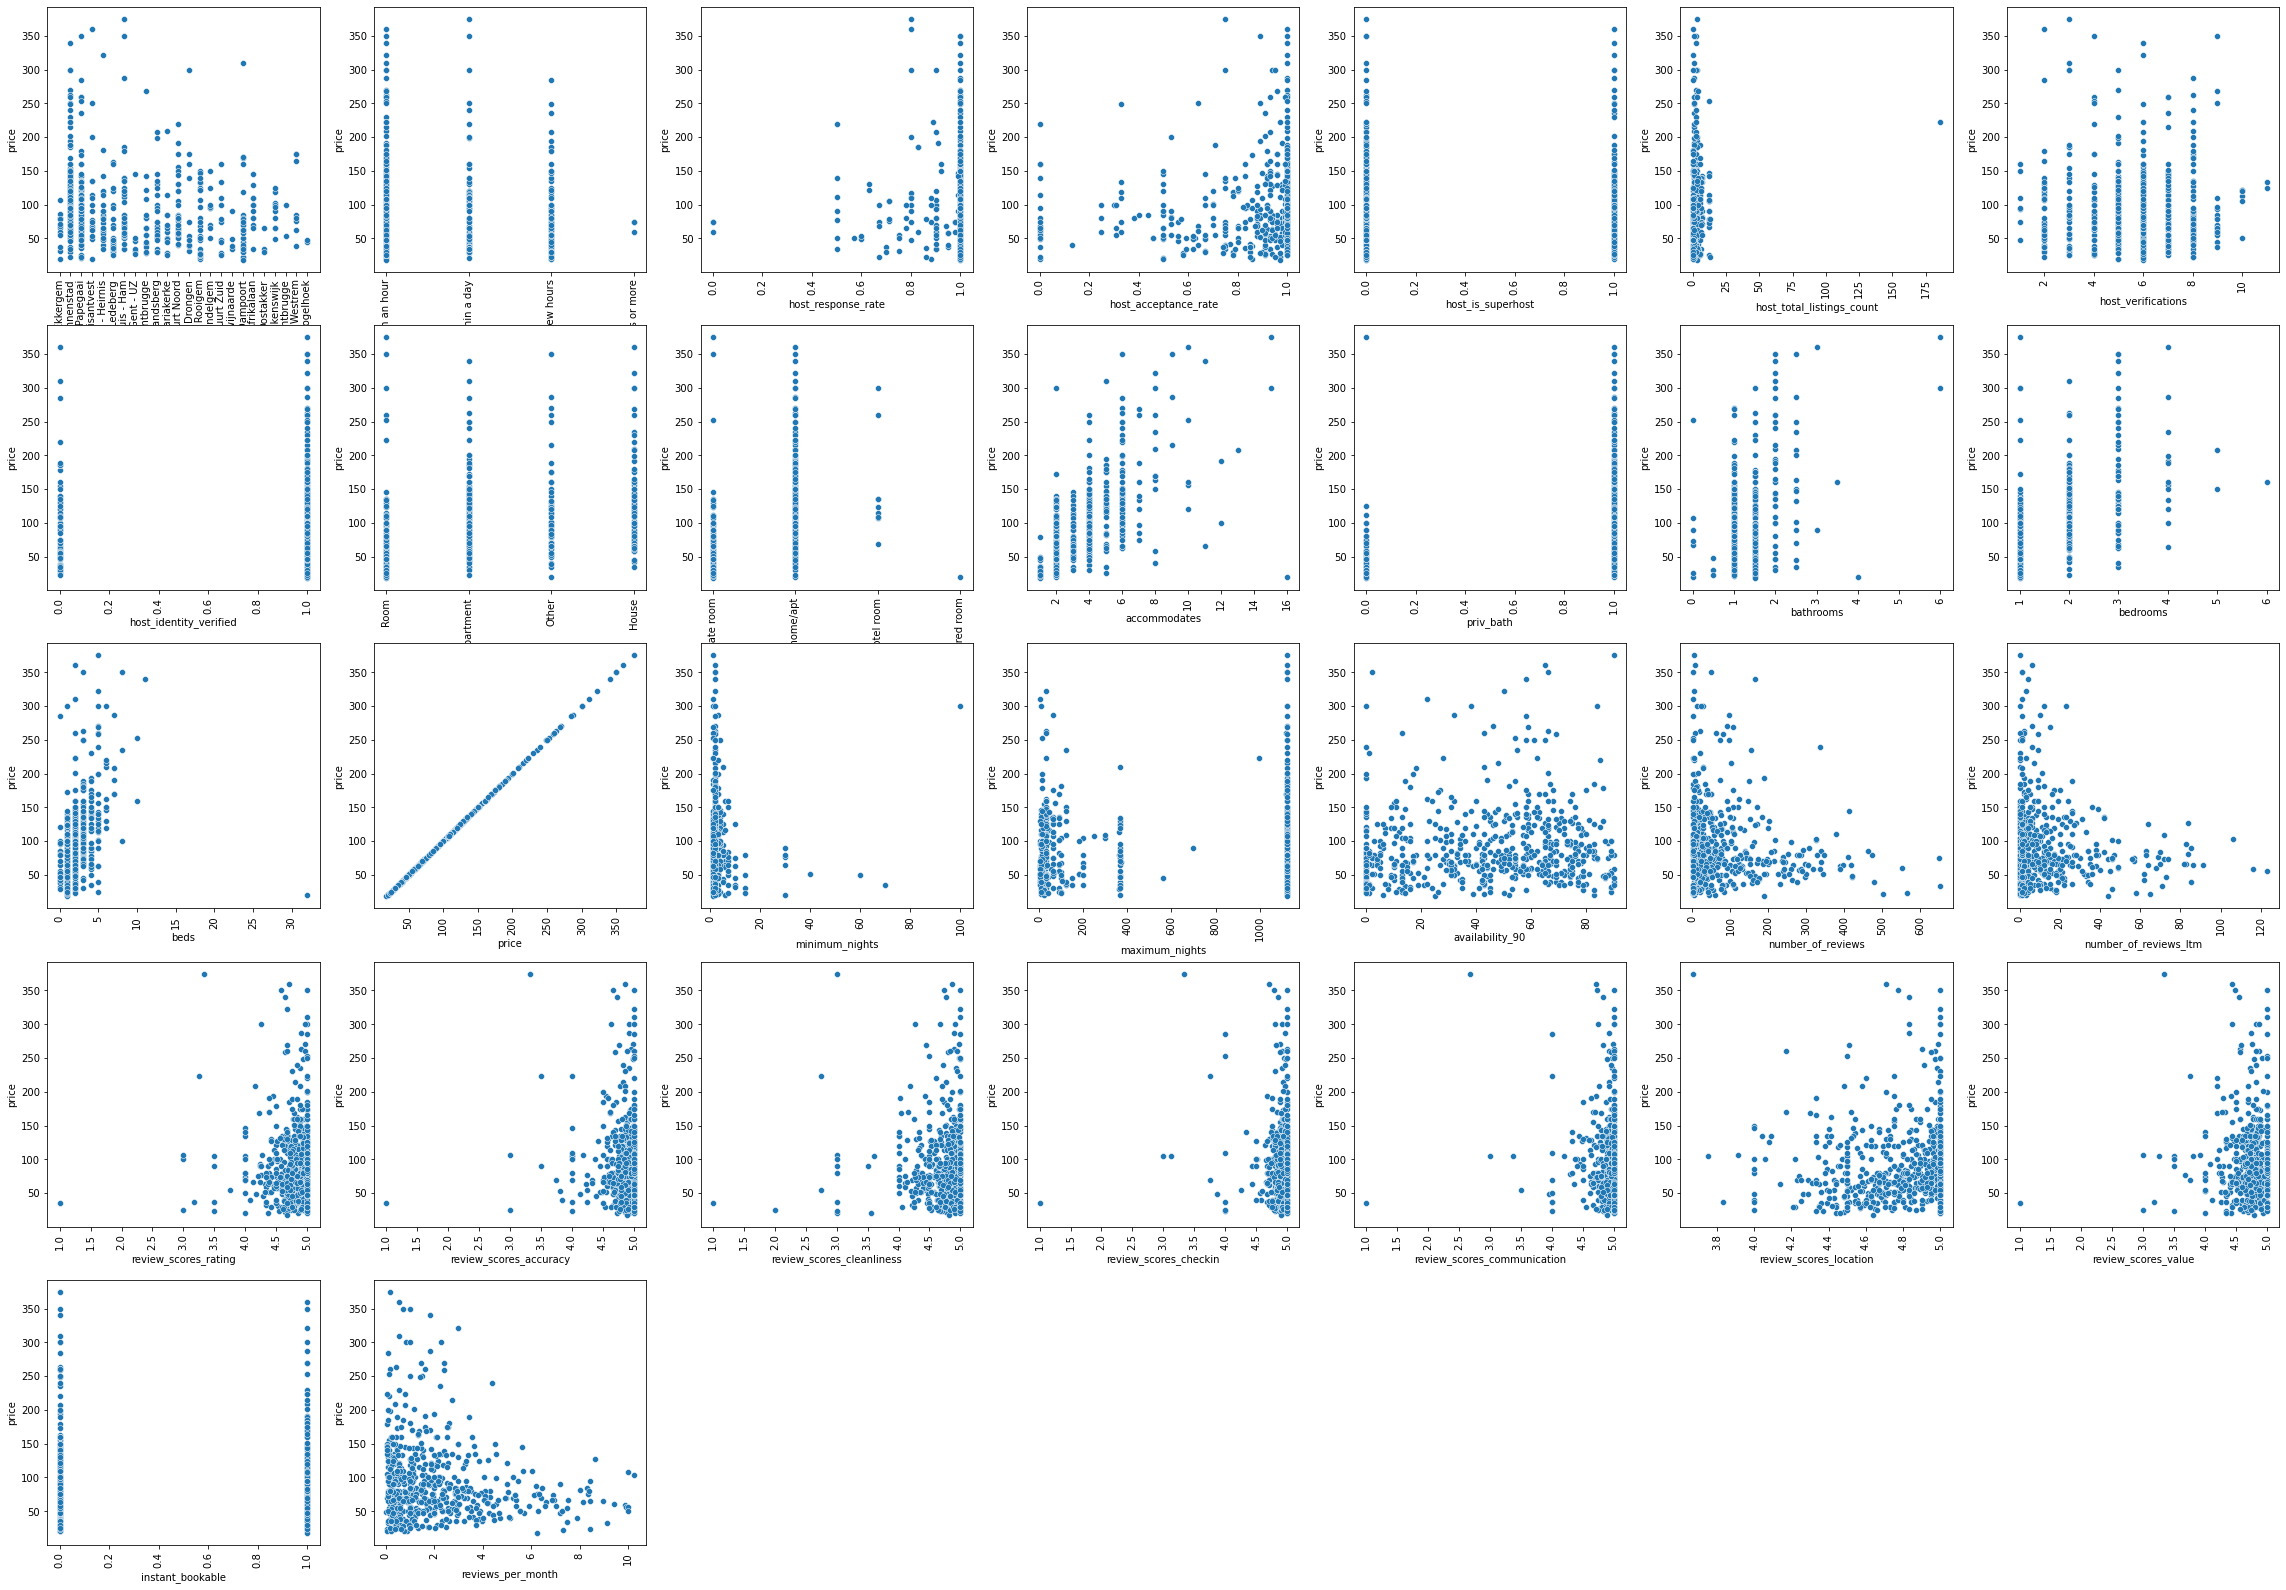

In [10]:
plt.figure(figsize=(16,12))
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dataset = listings[["neighbourhood_cleansed", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_total_listings_count", 
    "host_verifications", "host_identity_verified", "property_type","room_type",
    "accommodates", "priv_bath", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "availability_90",
    "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value", "instant_bookable", "reviews_per_month"]]
sns.distplot(dataset.price, bins=50)
plt.xlabel("Price")
plt.xticks(np.arange(min(dataset.price.to_numpy()), max(dataset.price.to_numpy()), 50.0))
plt.show()

#sns.pairplot(dataset, vars=["host_response_time", "host_response_rate", "host_acceptance_rate", "host_total_listings_count", "host_verifications", "host_identity_verified", "accommodates", "bedrooms", "beds", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "instant_bookable", "reviews_per_month", "room_type", "rt_Entire home/apt", "rt_Hotel room", "rt_Private room", "rt_Shared room"])

plt.figure(figsize=(40,40))
for i, k in enumerate(dataset.keys()):
    plt.subplot(7,7,1+i)
    plt.xticks(rotation=90)
    sns.scatterplot(x=dataset[k], y=dataset["price"])


On the price distribution plot we see that there are a few outliers to the right, but overall it resembles a guassian distribution. 
At first sight there aren't any features that have a strict linear correlation with the price. The only one that comes close is the 'accommodates' feature.
This means we will have to look into feature engineering to get some extra features that we can use to train our model on.

The 'host_total_listings_count' is heavily impacted by 1 outlier, we will later review this feature without this outlier.
We also notice that the features regarding the number of reviews seem to have an exponentially decreasing function as a top bound. This is quite logical, since listings with a very high price are probably booked less so there are also less reviews available.

Lastly, we see that features regarding the review scores have a lot more data for lower priced listings. However, the listings that have a high price generally seem to have better scores. This is also quite logical, since highly priced listings are probably more luxurious and are thus receiving higher scores.

### 3C: Boxplots

To view the effect of outliers and median values, we will now view some boxplots.
As said before, the accommodates feature is the closest to having a linear correlation with the price, so we will plot this feature first.

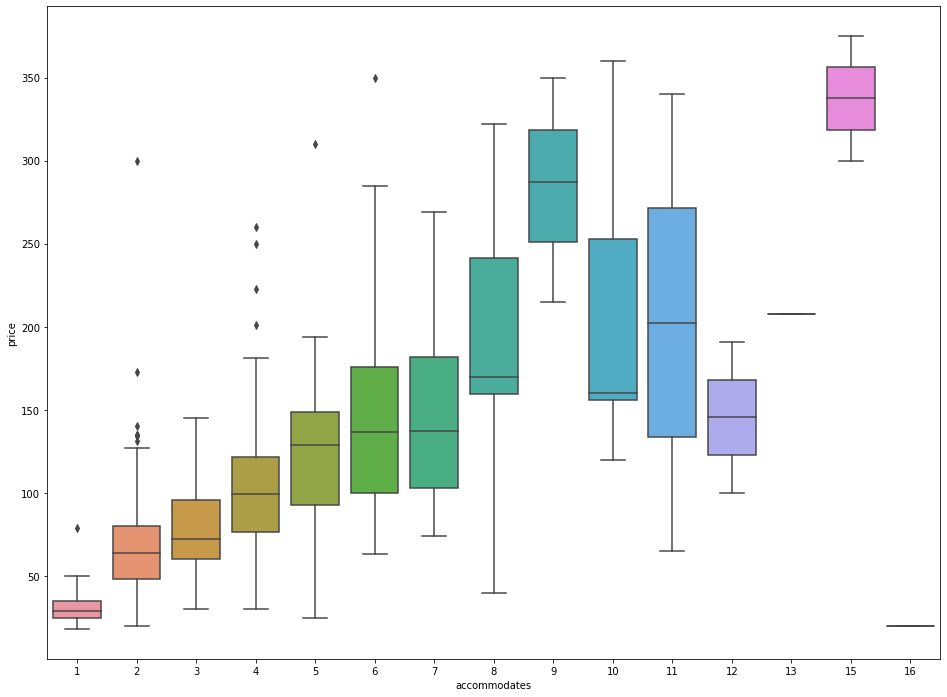

In [11]:
plt.figure(figsize=(16,12))
sns.boxplot(x="accommodates", y="price", data=dataset);

We can clearly see a linear trend between the amount of accommodates and the price. There are however a few weird things happening.
* The price for a listing with 9 accommodates is disproportionately high, while the price for listings with 12 accommodates is rather low.
* Listings with 13 and 16 accommodates are not represented in this dataset.

This means that when the number of accommodates is low (1 to 8) we should be able to predict the price fairly well with a linear regression model. However when the number of accommodates is higher than 8, this prediction will probably become less accurate.

We should also take into consideration that the different number of accommodates are not evenly represented in the dataset. To check this we use a countplot.

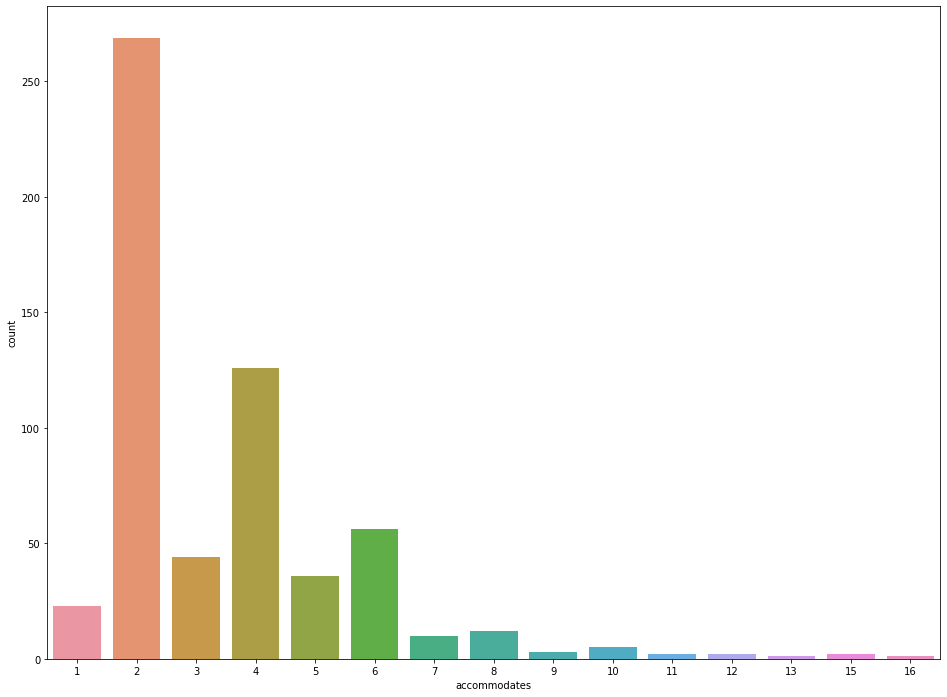

In [12]:
plt.figure(figsize=(16,12))
sns.countplot(x="accommodates", data=dataset);

This confirms that the strange values in the previous boxplot are likely due to the fact that these categories are underrepresented in this dataset.

Next we want to see if the room type has an effect on the price.

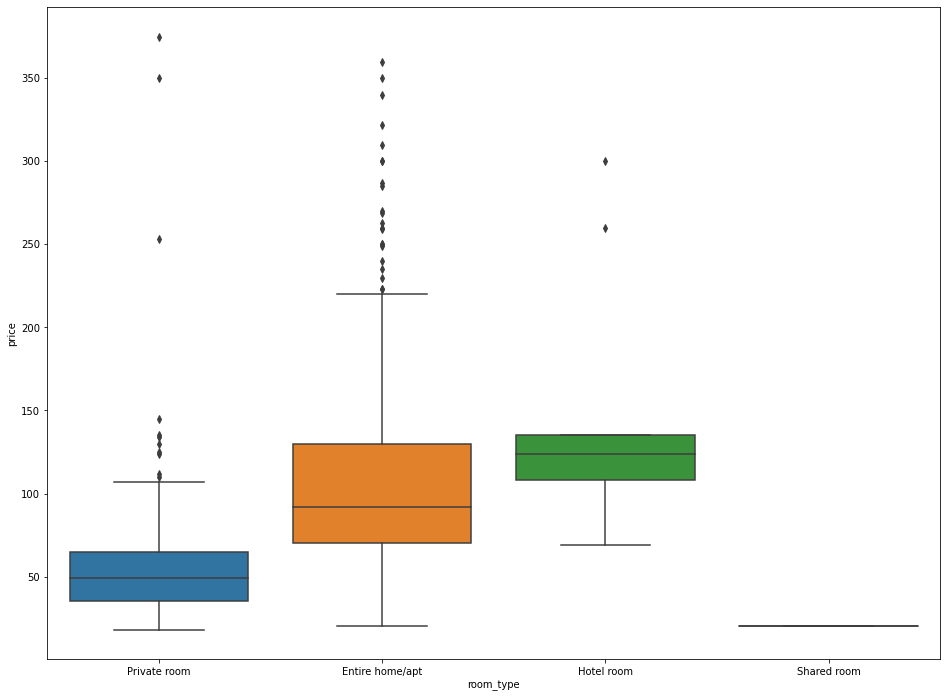

In [13]:
plt.figure(figsize=(16,12))
sns.boxplot(x=dataset.room_type, y=dataset.price);

It should not be a surprise that the median price for entire homes or appartments is higher than the median price of a private room, since entire homes or appartments have multiple rooms.
We notice that there are a lot of outliers in the Entire home/apt category. We think these outliers represent luxurious villa's or lofts, which are generally more costly than a normal house.
It is rather surprising that hotel rooms have a higher median price than entire homes. A possible explanation might be that hotels offer a room with breakfast or dinner with it, which drives up the price.

Generally we can conclude that the type of room has a clear impact on the price.

Next we want to see if there are substantial price differences between neighbourhoods. We suspect that a listing closer to the centre of Ghent will have a higher price than other listings.

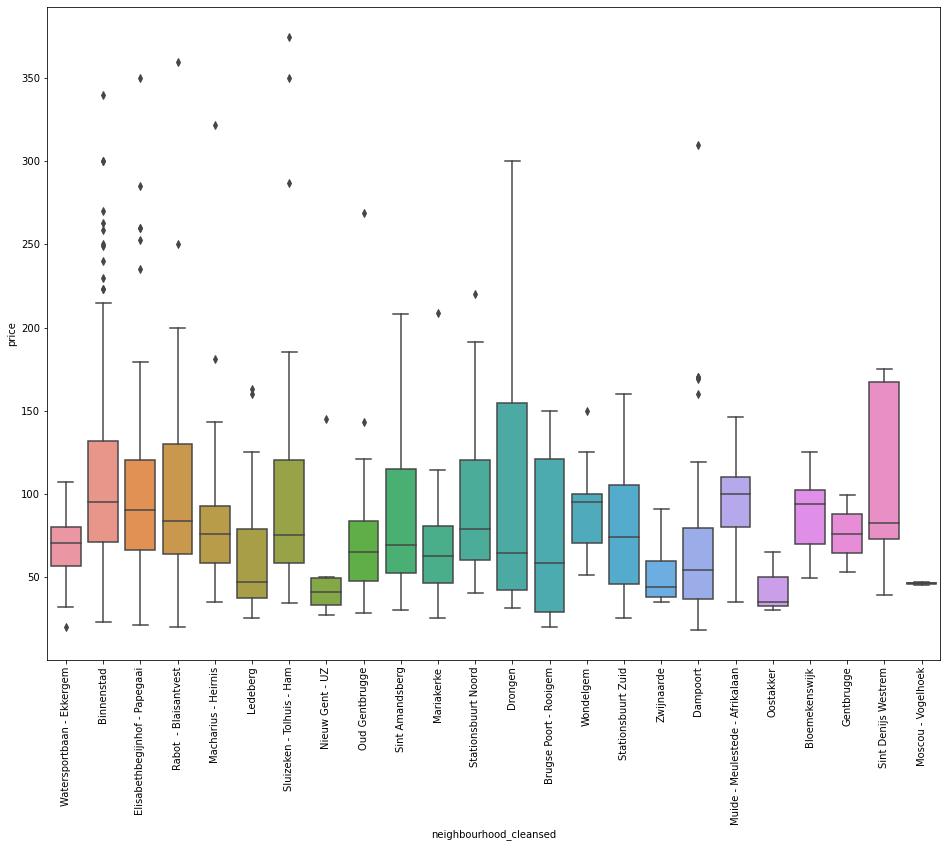

In [14]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(x=dataset.neighbourhood_cleansed, y=dataset.price);

This boxplot shows us that the median price of listings in the 'Binnenstad' is indeed higher than most of the other neighbourhoods. We also see that the centre of Ghent has a lot of outliers. These are probably mansions or lofts with a high price.

We also notice that 'Drongen' has a very large range of listings. The upper 25% of these listings has a really high price, while the median value actually is rather low.

We will now review the host_total_listings_count feature as promised. By using a boxplot we can see the distribution of the data more clearly while effectively isolating the outlier.

<AxesSubplot:xlabel='host_total_listings_count', ylabel='price'>

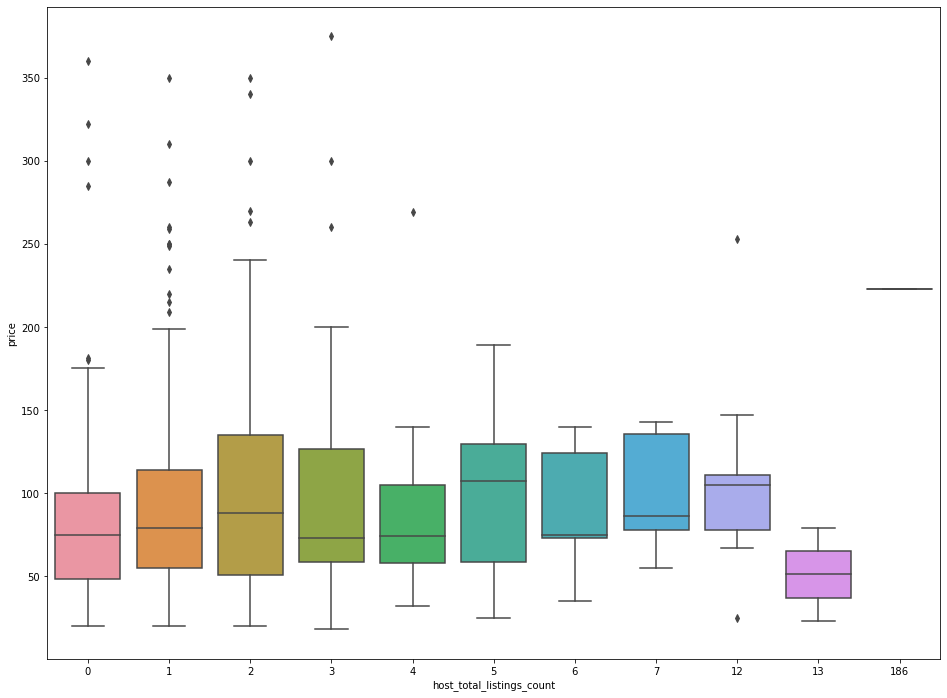

In [15]:
plt.figure(figsize=(16,12))
sns.boxplot(x=dataset.host_total_listings_count, y=dataset.price)

At first sight there doesn't seem to be a direct correlation between the total listings count and the price.
To confirm this, we plot the median price of the listings per host.

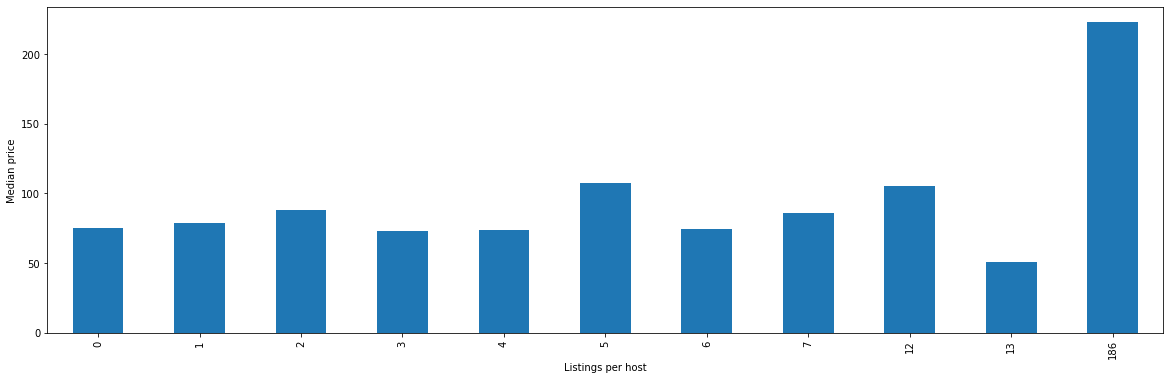

In [16]:
dataset.groupby('host_total_listings_count').price.median().plot(figsize=(20,6), kind='bar')
plt.xlabel('Listings per host')
plt.ylabel('Median price');

This shows us that the price of a listing most likely doesn't depend on the amount of listings the host has. We also suspect that this extreme outlier is a luxury hotel chain.

### 3D: Histograms

Number of listings per number of accommodates, bathrooms, bedrooms and beds

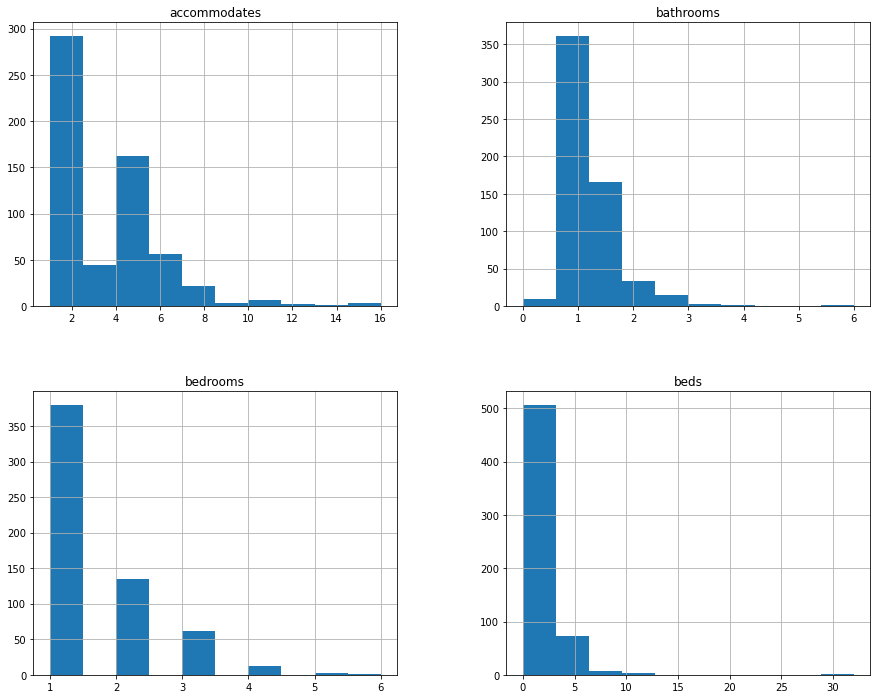

In [19]:
dataset[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist();

Distribution of property and room type

Entire home/apt    0.687500
Private room       0.295608
Hotel room         0.015203
Shared room        0.001689
Name: room_type, dtype: float64

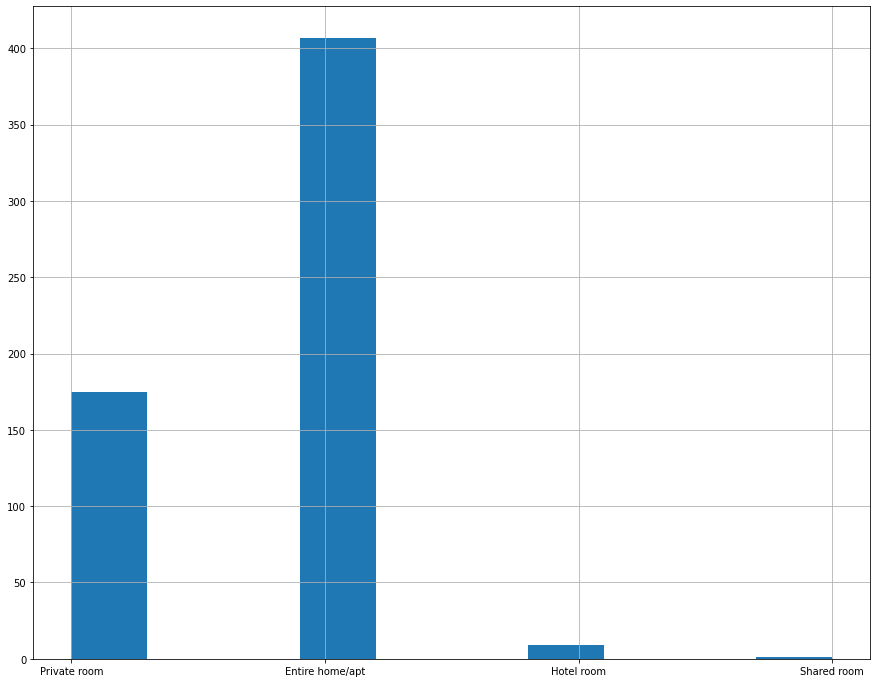

In [20]:
dataset['room_type'].hist()
dataset['room_type'].value_counts(normalize=True)

Apartment    0.371622
Room         0.314189
House        0.185811
Other        0.128378
Name: property_type, dtype: float64

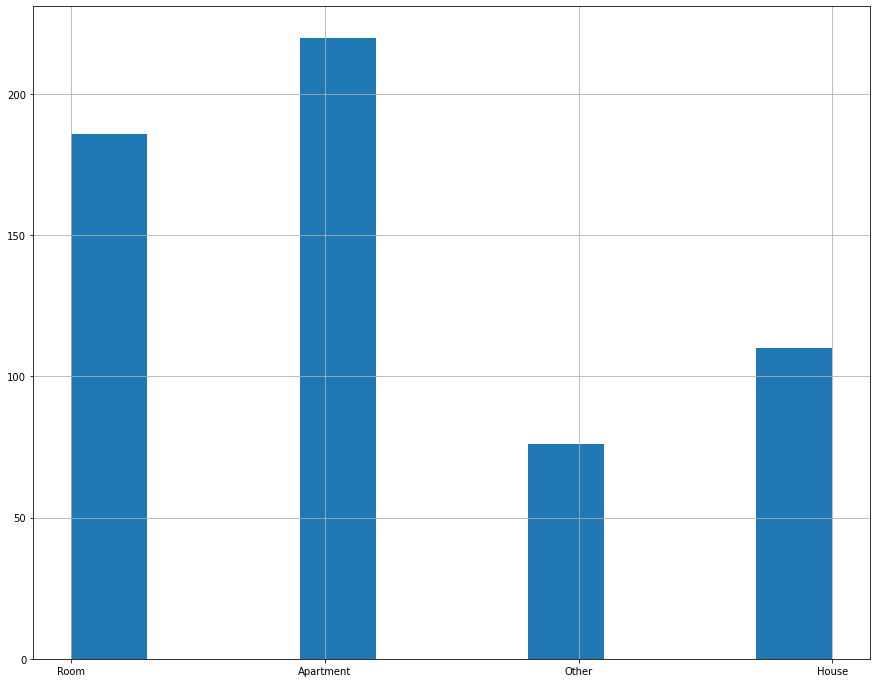

In [21]:
dataset['property_type'].hist()
dataset['property_type'].value_counts(normalize=True)

### 3E: One-hot encodings and correlation matrix
We do a one-hot encoding for categorical features. After that we can plot a correlation matrix.

In [22]:
# Replace categorical features with one-hot encodings
a = pd.get_dummies(listings['host_response_time'], prefix = "hrt")
b = pd.get_dummies(listings['room_type'], prefix = "rt")
c = pd.get_dummies(listings['property_type'], prefix = "pt")
frames = [listings, a, b, c]
listings = pd.concat(frames, axis = 1)

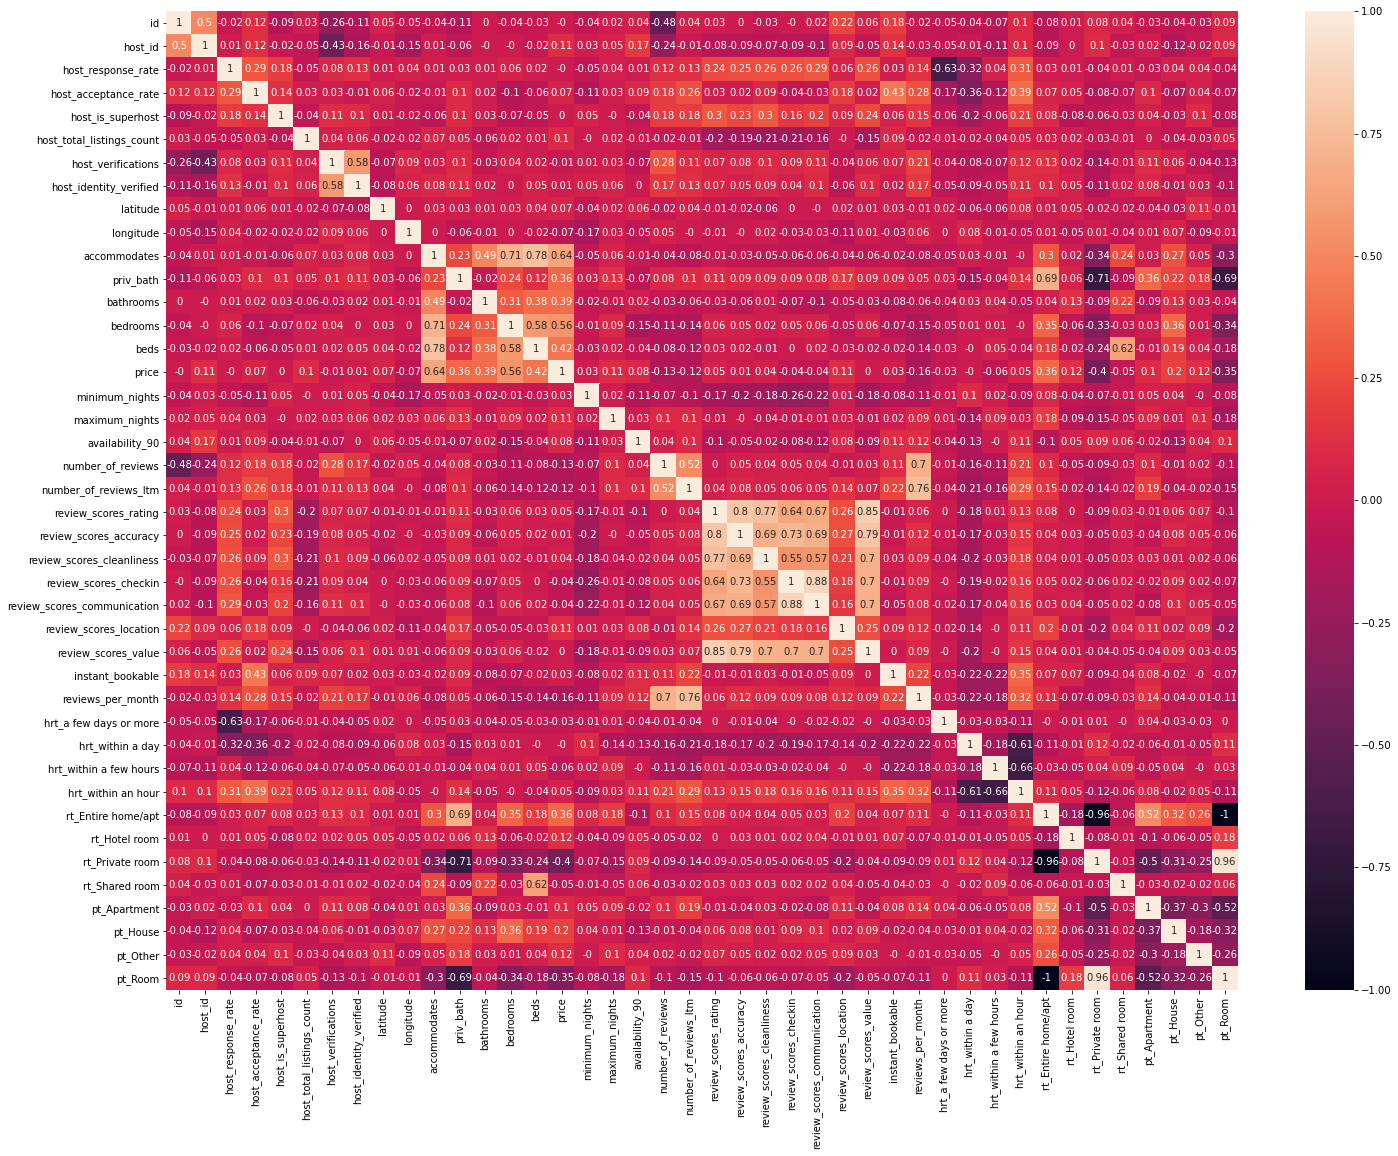

In [35]:
correlation_matrix = listings.corr().round(2)
plt.figure(figsize=(24,18))
sns.heatmap(data=correlation_matrix, annot=True);

### 3F: Log transformation of columns that could benefit from it
We can see that there are some features that could benefit from a log transformation. This can be concluded from the histograms from 3A.

After the transformation we can see that there are some features that are normally distributed.

In [24]:
tfo_listings = listings[["host_total_listings_count", "accommodates", "bathrooms", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "number_of_reviews"]]

for col in tfo_listings.keys():
    tfo_listings[col] = tfo_listings[col].astype('float64').replace(0.0, 0.01)
    tfo_listings[col] = np.log(tfo_listings[col])

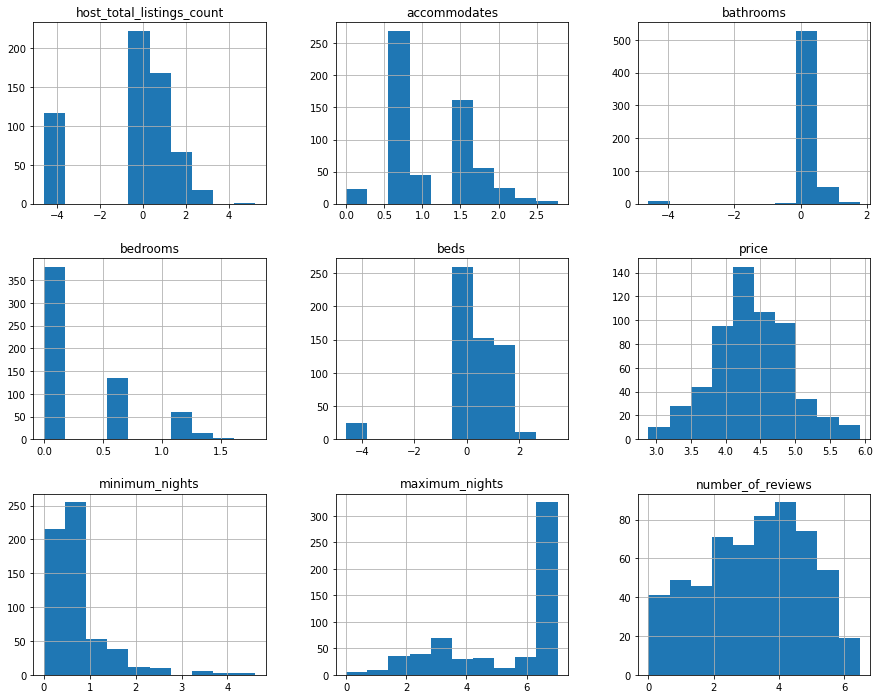

In [25]:
tfo_listings.hist();

Now we can drop some colums that are not needed anymore.

In [26]:
dataset.drop(['neighbourhood_cleansed'], inplace=True, axis=1)
dataset.drop(['room_type'], inplace=True, axis=1)
dataset.drop(['property_type'], inplace=True, axis=1)
dataset.drop(['host_response_time'], inplace=True, axis=1)

# Linear Regression Model

## Step 1 : Train - Test - Split

In [27]:
x = tfo_listings.drop(['price'], axis=1) # pd.concat((), axis=1)
y = tfo_listings['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Step 2: Normalizing the data

In [28]:
# TODO
# formule: x-xmin/xmax-xmin

## Step 3 : Training the model

In [29]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

y_train_predict = lin_model.predict(x_train)
y_test_predict = lin_model.predict(x_test)

## Step 4 : Measure the performance of the model

In [30]:
# model evaluation for training set
n_train = len(x_train)  # sample size
p_train = len(x_train.columns)  # number of independent variables
R2_train = r2_score(y_train, y_train_predict)
RMSE_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
# use the adjusted R² score to counter accidental increase of score with number of input features.
adj_R2_train = 1 - ((1-R2_train) * (n_train-1)/(n_train-p_train-1))   #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)

print("Model train performance")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE_train))
print('R2 score is {}'.format(R2_train))
print('adjusted R2 score is {}'.format(adj_R2_train))
print("\n")

# model evaluation for testing set
n_test = len(x_test)
p_test = len(x_test.columns)
R2_test = r2_score(y_test, y_test_predict)
RMSE_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
adj_R2_test = 1 - ((1-R2_test) * (n_test-1)/(n_test-p_test-1))   #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)

print("Model test performance")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE_test))
print('R2 score is {}'.format(R2_test))
print('adjusted R2 score is {}'.format(adj_R2_test))
print("\n")


print("Model parameters")
print("--------------------------------------")
print(lin_model.coef_)
print(lin_model.intercept_)

Model train performance
--------------------------------------
RMSE is 0.40113675551595984
R2 score is 0.47352554962292015
adjusted R2 score is 0.46444840392676356


Model test performance
--------------------------------------
RMSE is 0.46145790218181676
R2 score is 0.42403114951202703
adjusted R2 score is 0.3821425058401745


Model parameters
--------------------------------------
[ 0.01235702  0.67728648  0.07746774  0.08147468 -0.03432092 -0.03735267
  0.01935569 -0.03895087]
3.6672084040329564


Compare the predicted values with the actual output.

In [31]:
y_test_array = np.array(list(y_test))
y_test_predict_array = np.array(y_test_predict)
compare_table = pd.DataFrame({'Truth': y_test_array.flatten(), 'Predicted': y_test_predict_array.flatten()})
compare_table

,Truth,Predicted
0,4.248495,4.409580
1,5.075174,4.626994
2,4.574711,5.135002
3,3.912023,4.095244
4,5.594711,4.990888
...,...,...
114,3.951244,4.101057
115,3.871201,4.226658
116,5.010635,4.780144
117,3.218876,4.145853


# Random Forest Regression

## Step 1: Setup

In [32]:
# change figsize here
plt.rcParams['figure.figsize'] = 8, 6

# helper functions
def run_predictions(tree, x):
    predictions = []
    for index, sample in x.iterrows():
        prediction = tree.predict(sample)
        predictions.append(prediction)
    return predictions
    
def visualize_results(predictions, ground_truth):
    
    plt.scatter(ground_truth, predictions, alpha=0.5)
    plt.xlabel("Ground truth price")
    plt.ylabel("Predicted price")
    plt.show()
    
    rmse = (np.sqrt(mean_squared_error(ground_truth, predictions)))
    r2 = r2_score(ground_truth, predictions)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

## Step 2: Split dataset

In [33]:
#Split dataset in training and test set 
#TODO choose features more wisely

ds_copy = tfo_listings #dataset[["price", "host_response_time", "host_total_listings_count", "host_verifications", "host_identity_verified", "accommodates", "bathrooms", "bedrooms", "beds", "minimum_nights", "maximum_nights", "instant_bookable"]]
X = ds_copy.drop(['price'], axis=1)
Y = ds_copy["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## Step 3: Run random forest regression

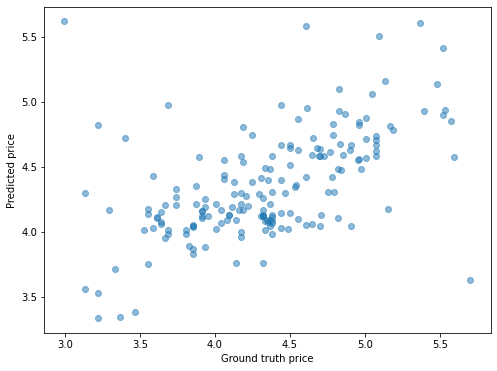

RMSE is 0.48146645257168935
R2 score is 0.2690208787867895


In [34]:
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X_train, Y_train)

predictions = regr.predict(X_test)

visualize_results(predictions, Y_test)

It is clear from the RMSE and R2 measurements that the random forest regression does not deliver the best result. But we see the right shape of y=x with some noise.